In [76]:
import pandas as pd

dataset = pd.read_excel(r"Date_Fruit_Datasets.xlsx")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [77]:
#MLP ---> Multi Layer Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn .neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
label_encoder = preprocessing.LabelEncoder() 

dataset.Class= label_encoder.fit_transform(dataset.Class) 
  
dataset.Class.unique() 

array([0, 1, 2, 3, 4, 5, 6])

In [79]:

X= dataset.iloc[:,0:34]
y= dataset.Class

columns_to_convert = ['AREA', 'CONVEX_AREA', 'EntropyRR', 'EntropyRG', 'EntropyRB']
for col in columns_to_convert:
    dataset[col] = dataset[col].astype('float64')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    float64
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    float64
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [80]:
scaler = StandardScaler() ###İmportant
X = scaler.fit_transform(X)
print(X)

[[ 1.15563972  0.78394219  0.60450726 ...  0.53834033  0.43559289
  -0.02390791]
 [ 0.37169955  0.06706714 -0.18747301 ... -0.00354973  0.28411298
  -0.02469438]
 [ 2.13226458  1.4391311   1.31912143 ...  0.95889749  0.74233511
   0.3552428 ]
 ...
 [-0.41017878 -0.31949739 -0.02304289 ... -0.37064418 -0.56715228
  -0.6589192 ]
 [-0.55362172 -0.36944589 -0.23728094 ...  0.071247   -0.21883206
  -0.22875922]
 [ 0.42446789  0.56520261  0.50723897 ... -0.1705156  -0.71603977
  -0.77948909]]


In [81]:
#Veri setini eğitim ve test setlerine böl
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.25,random_state=1)


In [82]:
print(f"""
    xTrain: {X_train.shape},
    xTest: {X_test.shape}, 
    xVal: {X_val.shape}, 

    
    yTrain: {y_train.shape},
    yTest: {y_test.shape}
    y_val: {y_val.shape}

    dataset: {dataset.Class}
    info: {dataset.info()}
    """)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    float64
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    float64
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [83]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(34,))) #Giriş Katmanı
model.add(layers.Dense(50,activation='relu')) #Hidden Layer
model.add(layers.Dense(50,activation='relu')) #Hidden Layer
model.add(layers.Dense(7,activation='softmax')) #Çıkış Katmanı

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=250,verbose=True, validation_data=(X_val, y_val))

Epoch 1/250


/Users/snrbsk/Desktop/Projects/ML-DS-Projects/btk-manisa-yapayZeka/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3021 - loss: 1.8373 - val_accuracy: 0.7156 - val_loss: 1.3957
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - loss: 1.2818 - val_accuracy: 0.7244 - val_loss: 0.8991
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7153 - loss: 0.8662 - val_accuracy: 0.7822 - val_loss: 0.6390
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.6118 - val_accuracy: 0.8311 - val_loss: 0.4906
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4774 - val_accuracy: 0.8400 - val_loss: 0.4265
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3917 - val_accuracy: 0.8533 - val_loss: 0.3827
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3913 - val_accuracy: 0.8622 - val_loss: 0.3539
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8968 - loss: 0.3231 - val_accuracy: 0.8711 - val_loss: 0.3

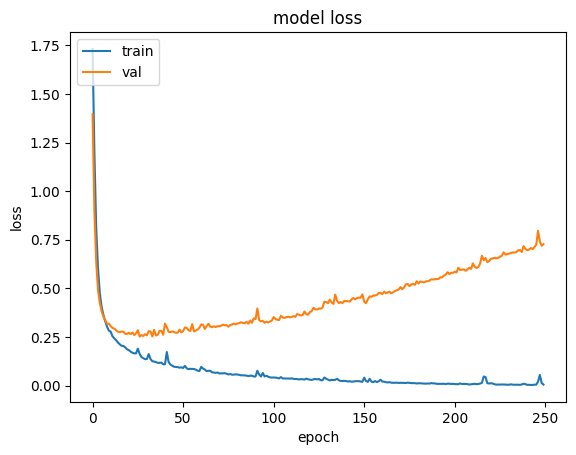

In [84]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.76      0.72      0.74        18
           2       0.93      0.93      0.93        41
           3       0.91      1.00      0.95        10
           4       0.94      0.87      0.90        38
           5       1.00      1.00      1.00        43
           6       0.65      0.93      0.76        14

    accuracy                           0.90       180
   macro avg       0.87      0.89      0.87       180
weighted avg       0.91      0.90      0.90       180



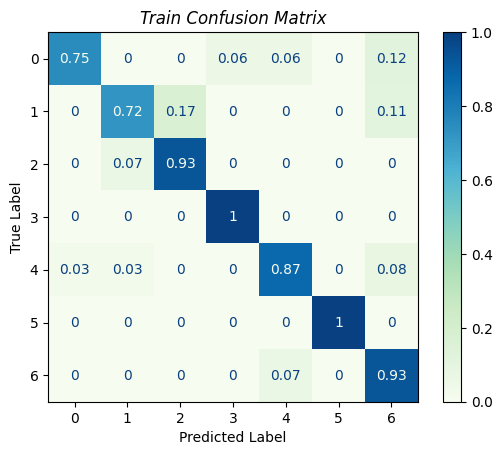

In [85]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
yTestPred  = model.predict(X_test)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(y_test)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title('Train Confusion Matrix',style="italic")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()